Font name: `Inter`
Shape of observations: (5000, 100, 31)
Number of runs: 100
Number of full runs: 79
Percentage of full runs: 79.00%
Payload shape: (5000, 100, 3)
Payload velocity shape: (5000, 100, 3)
Other quads shape: (5000, 100, 3)
q_pos shape: (5000, 100, 3)
q_rot_mat shape: (5000, 100, 9)
q_linvel shape: (5000, 100, 3)
q_angvel shape: (5000, 100, 3)
q_linacc shape: (5000, 100, 3)
q_angacc shape: (5000, 100, 1)
q_last_action shape: (5000, 100, 0)
Payload shape (timesteps, runs, dims): (5000, 100, 3)


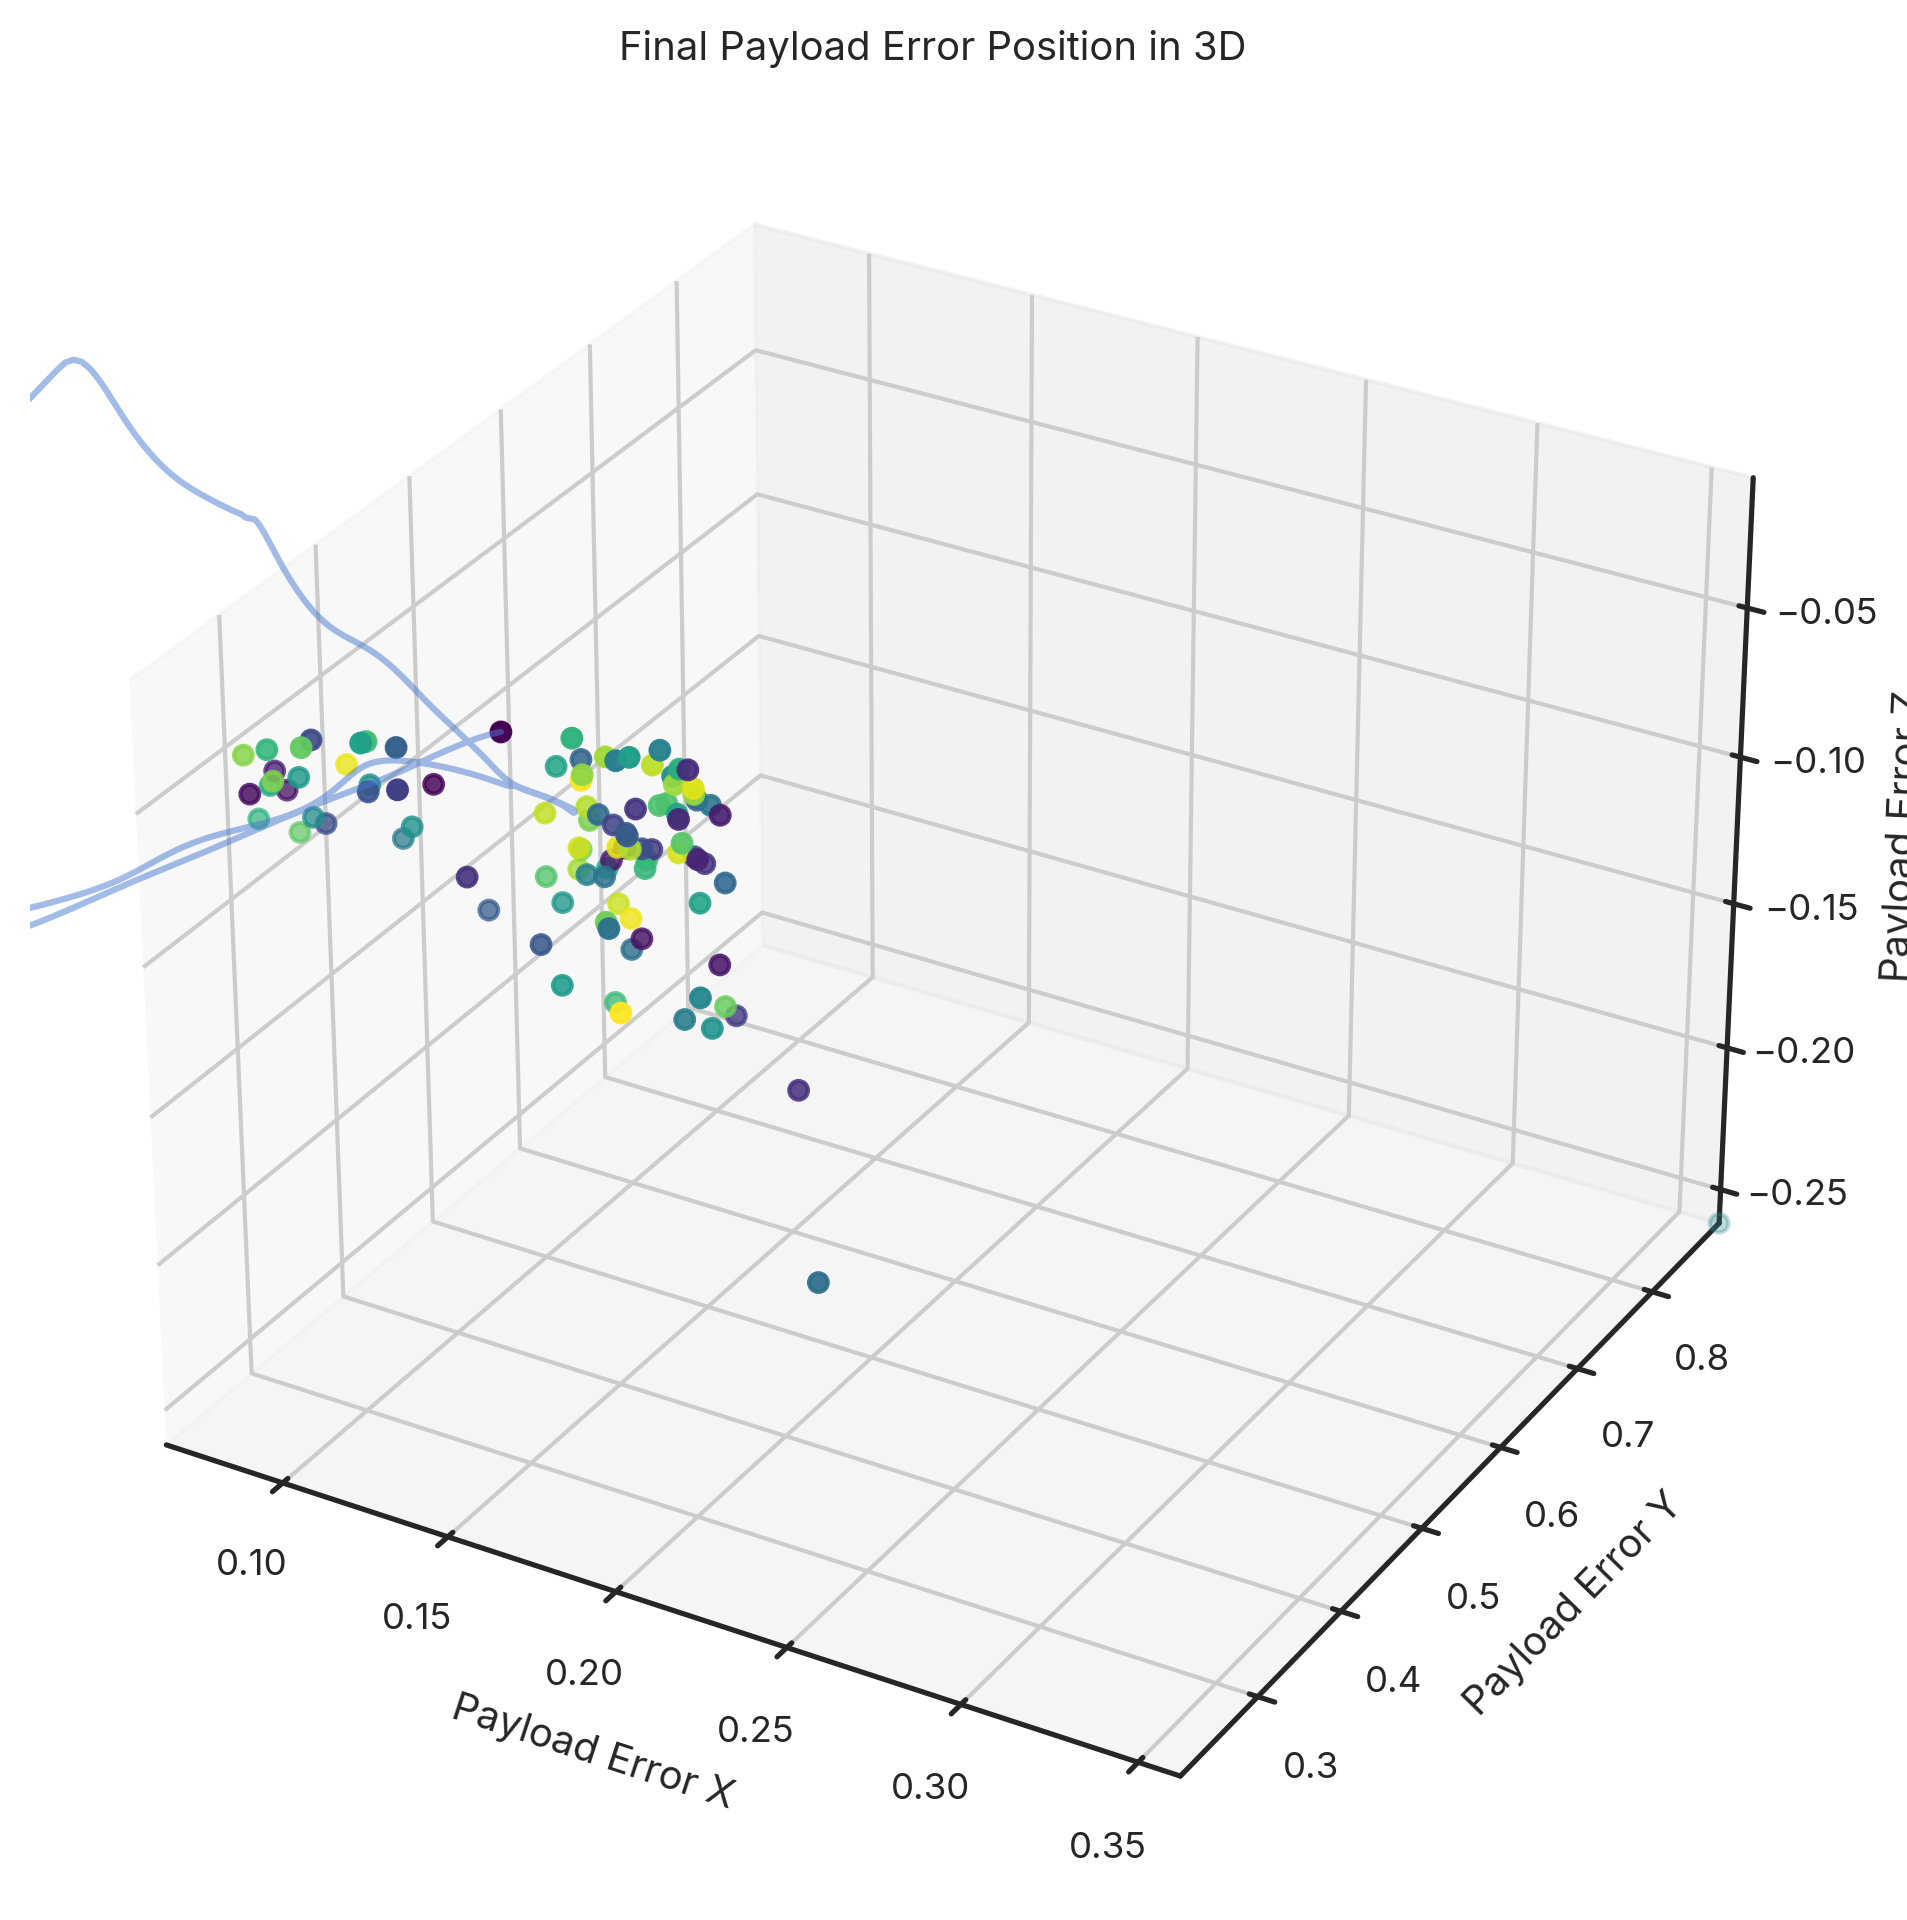

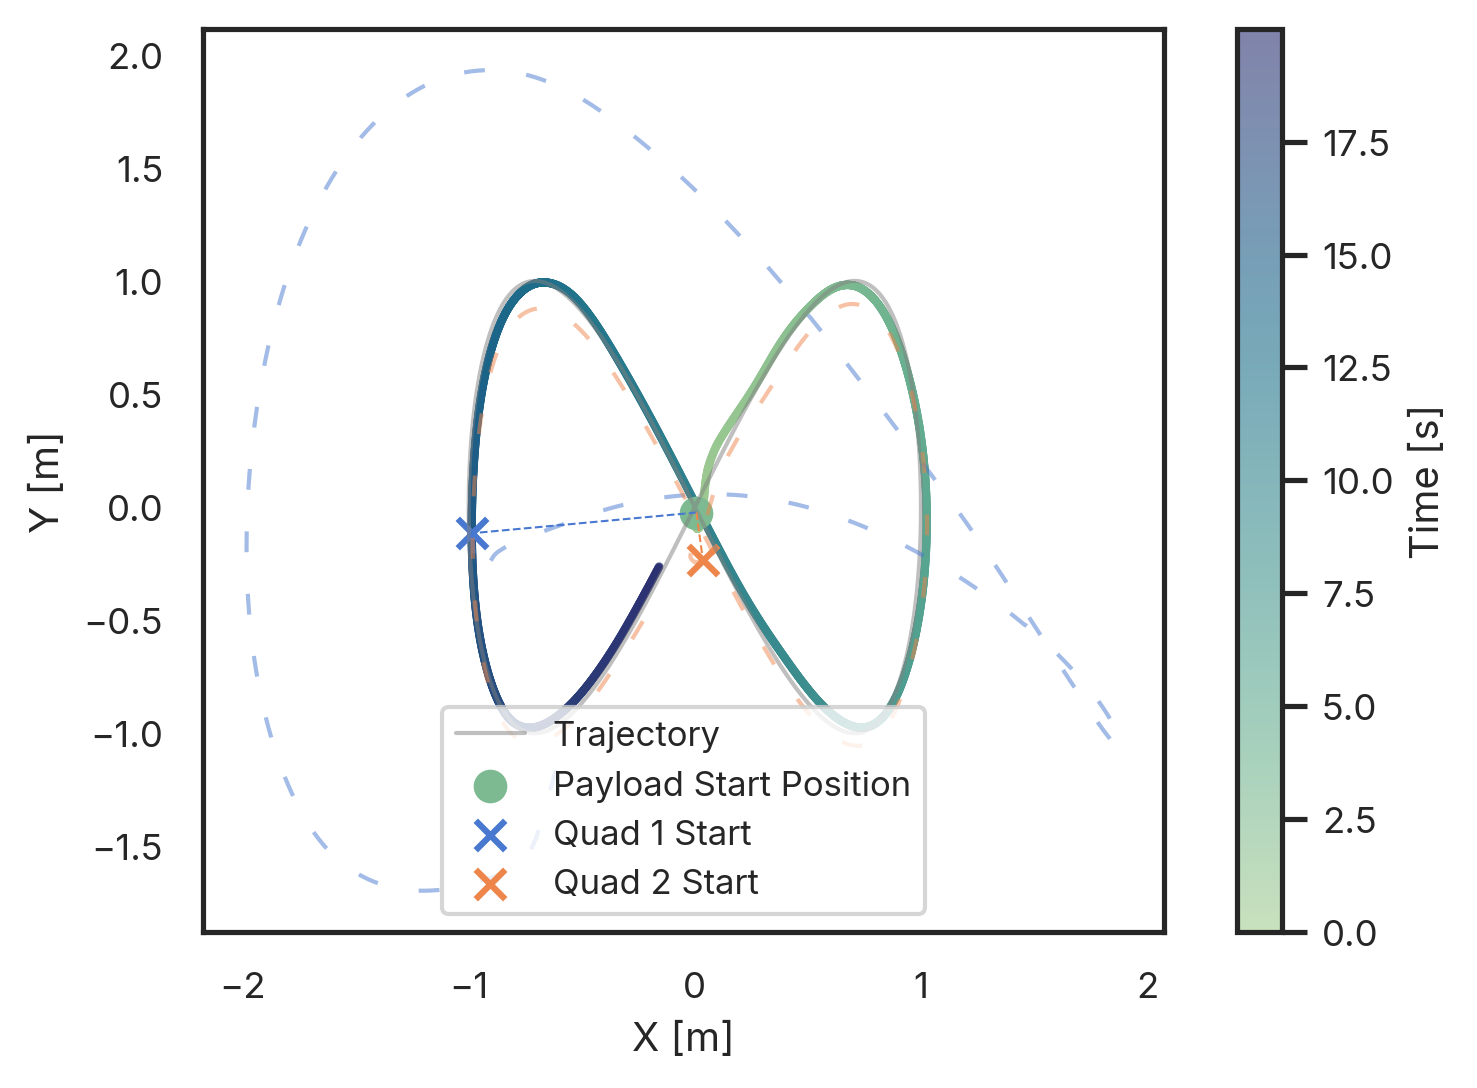

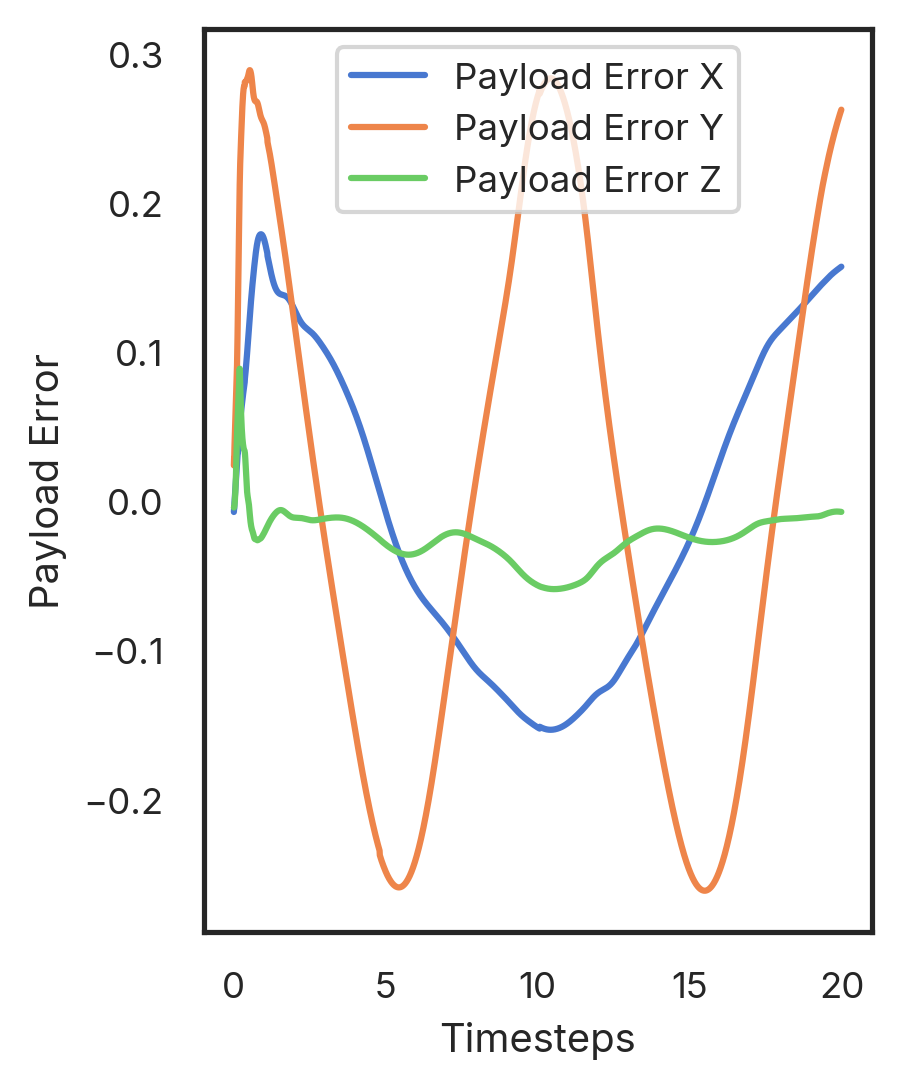

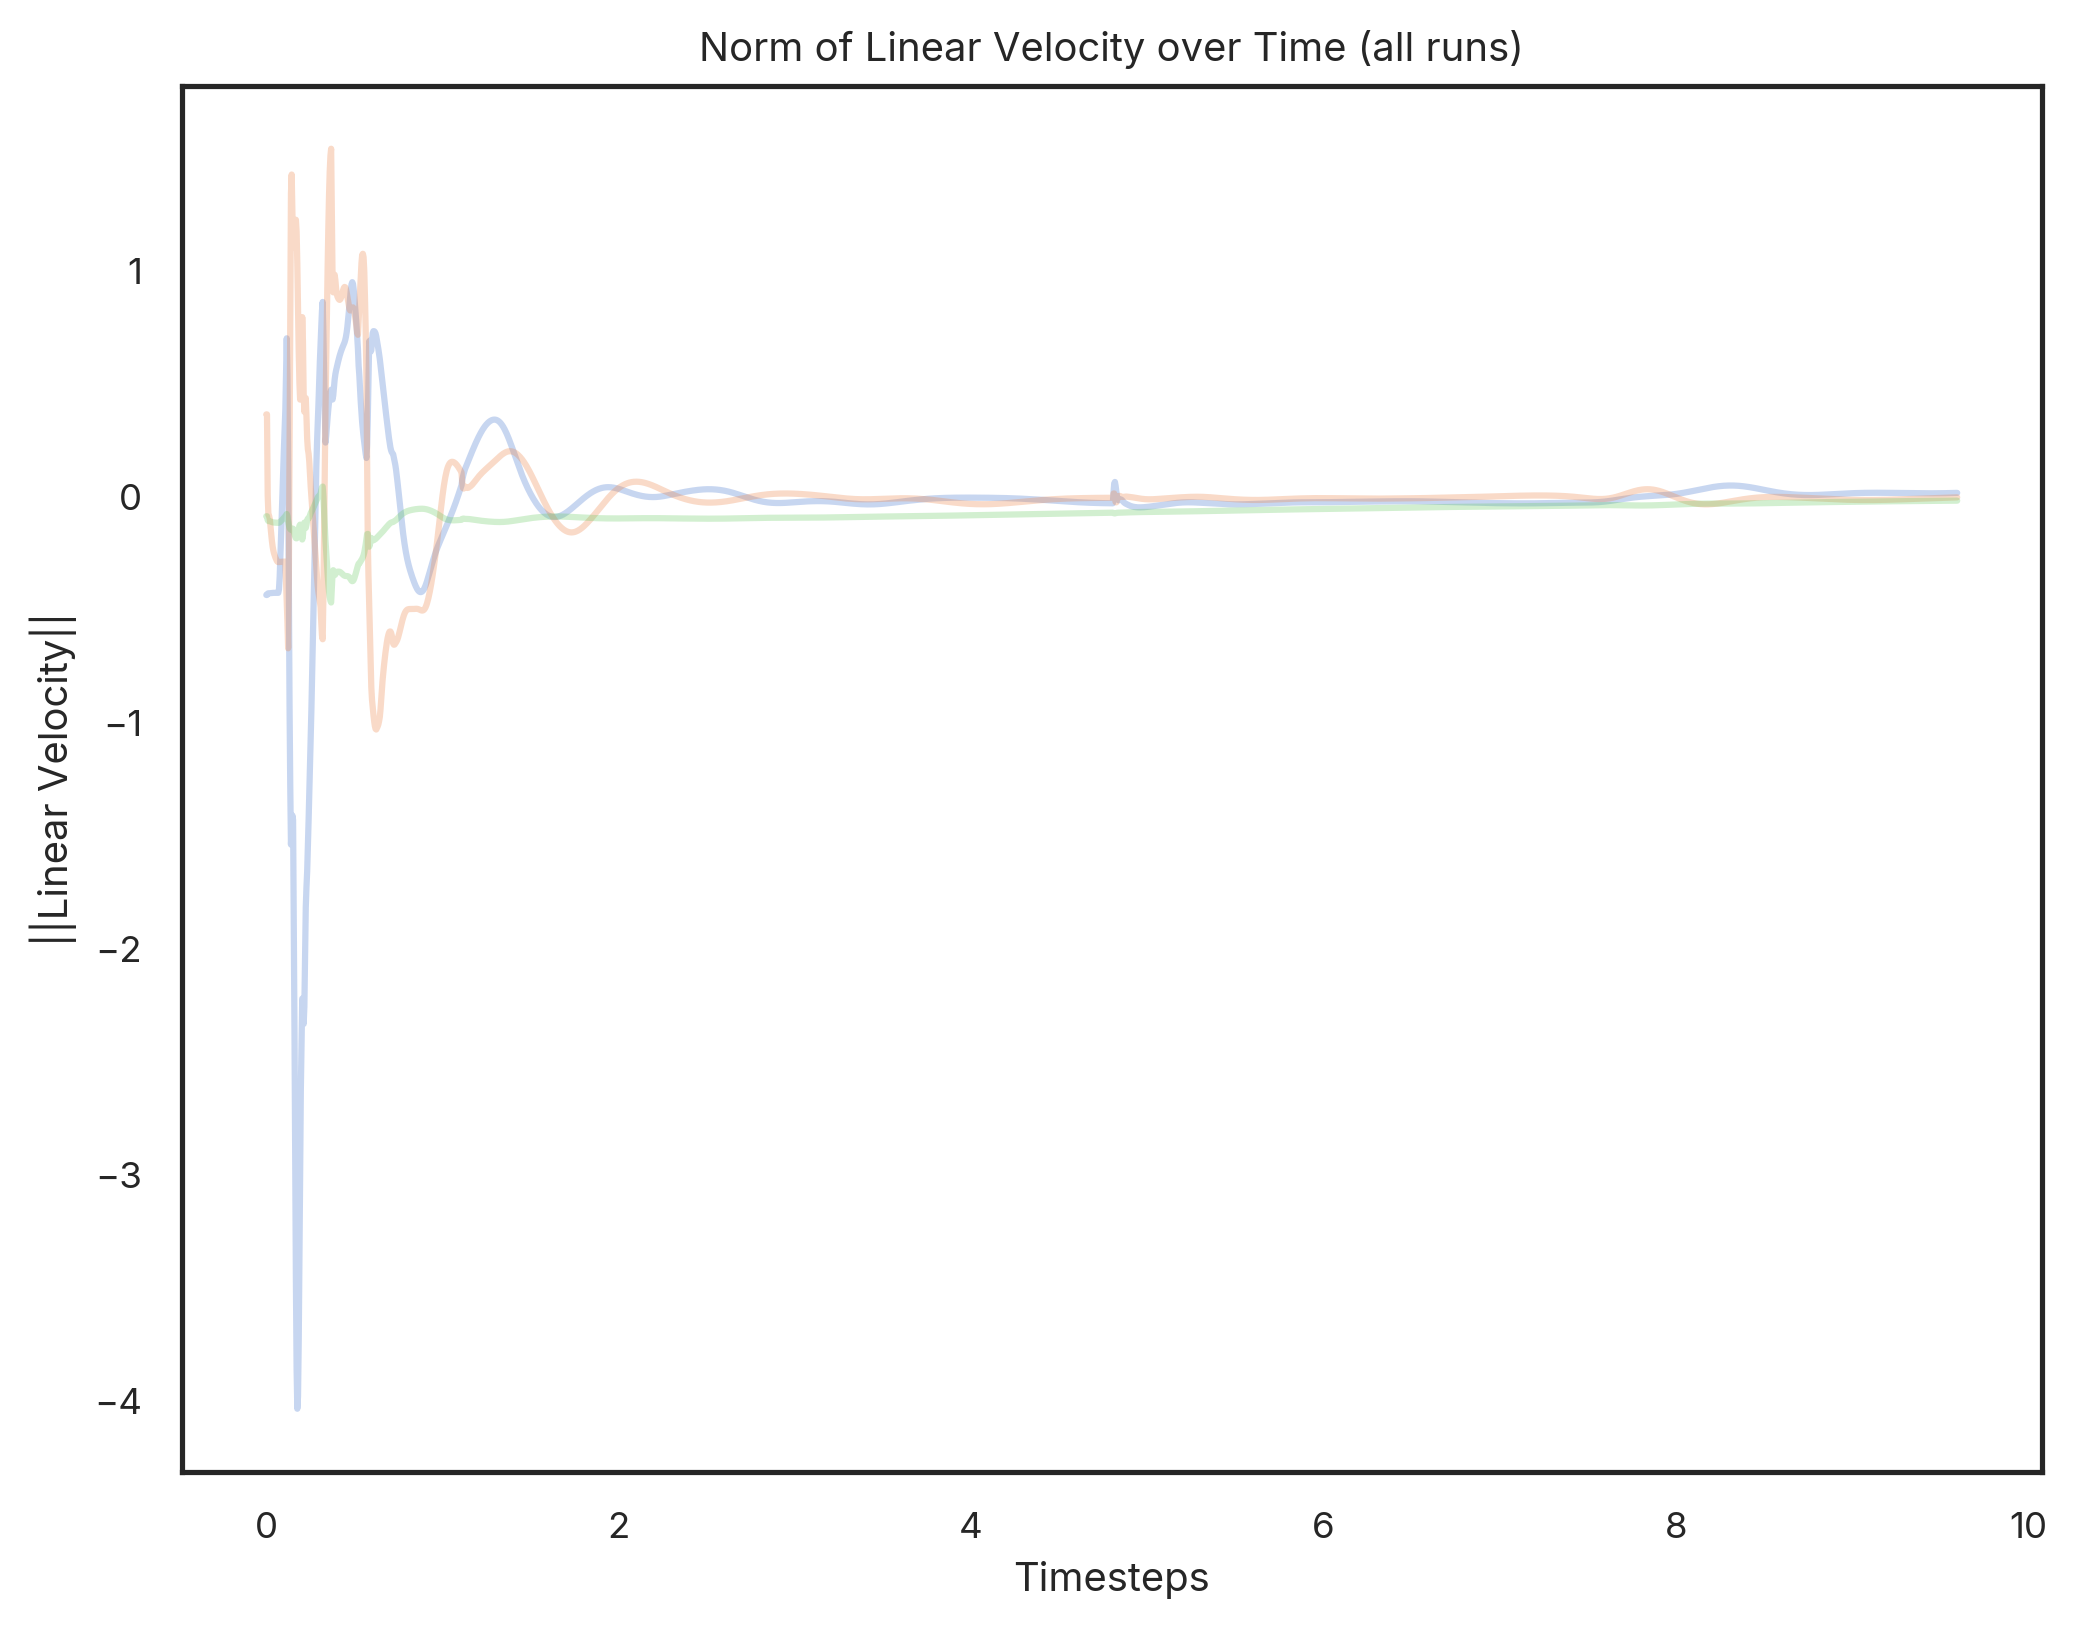

Average Payload Speed: 0.4595619


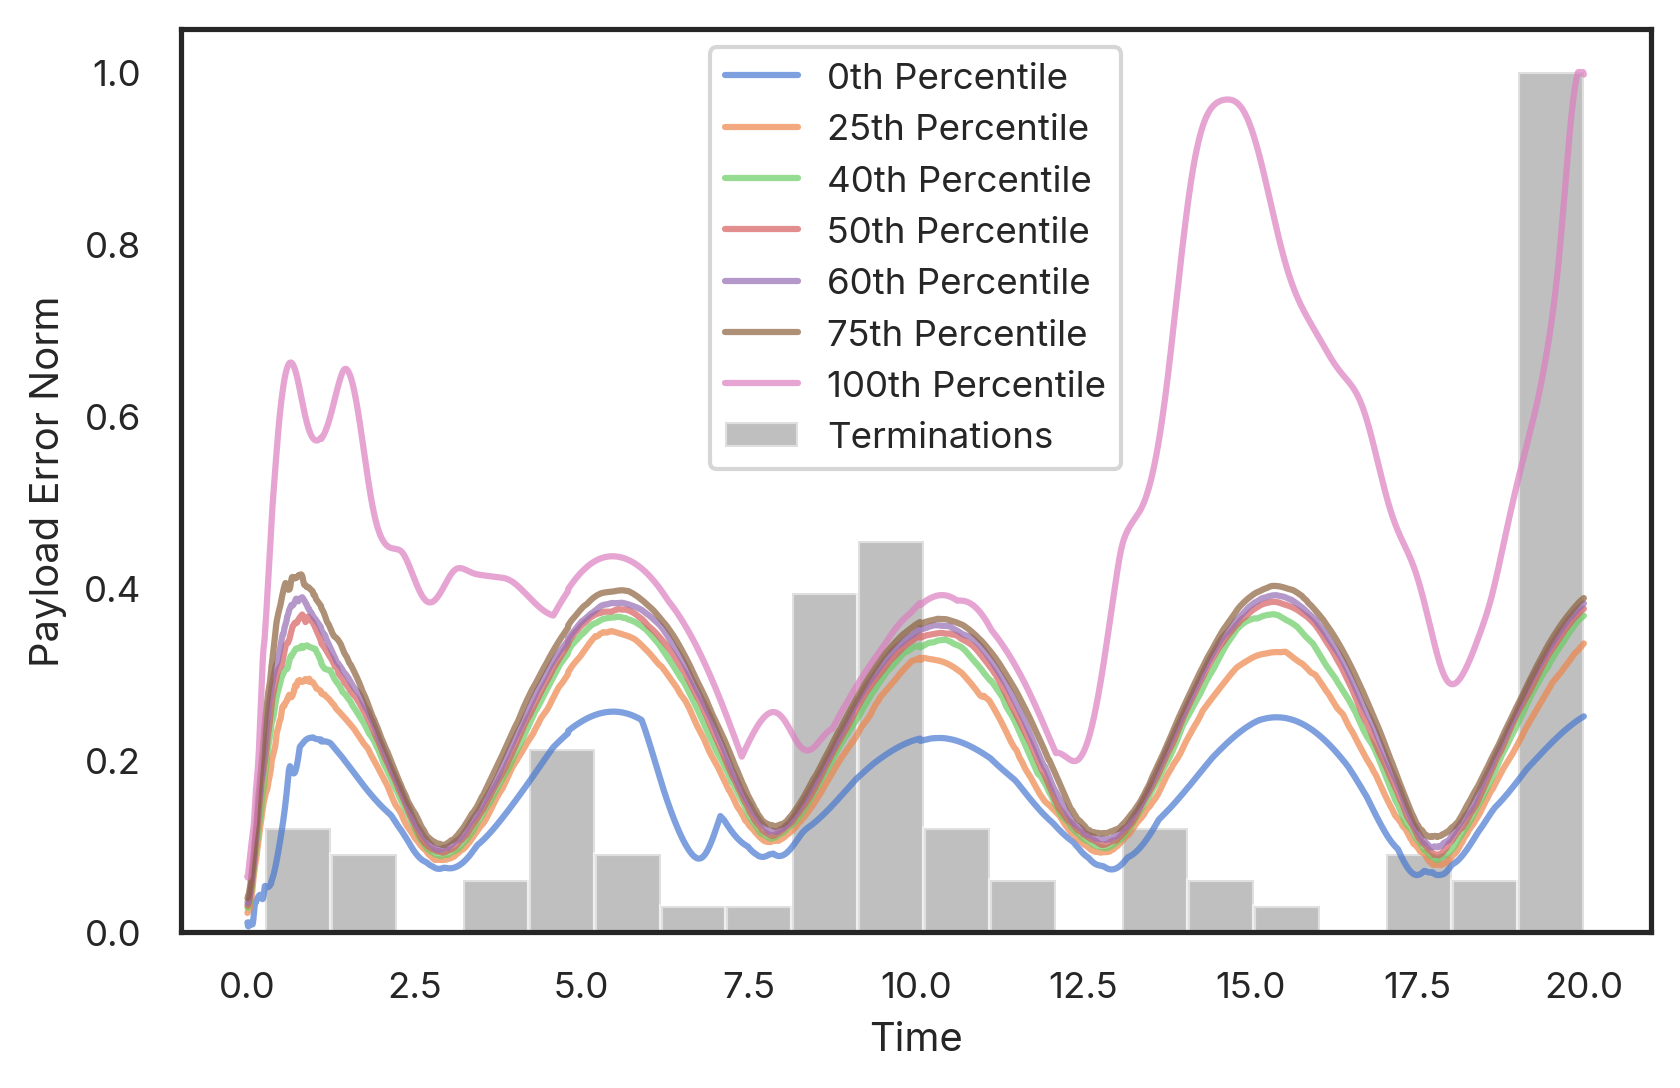

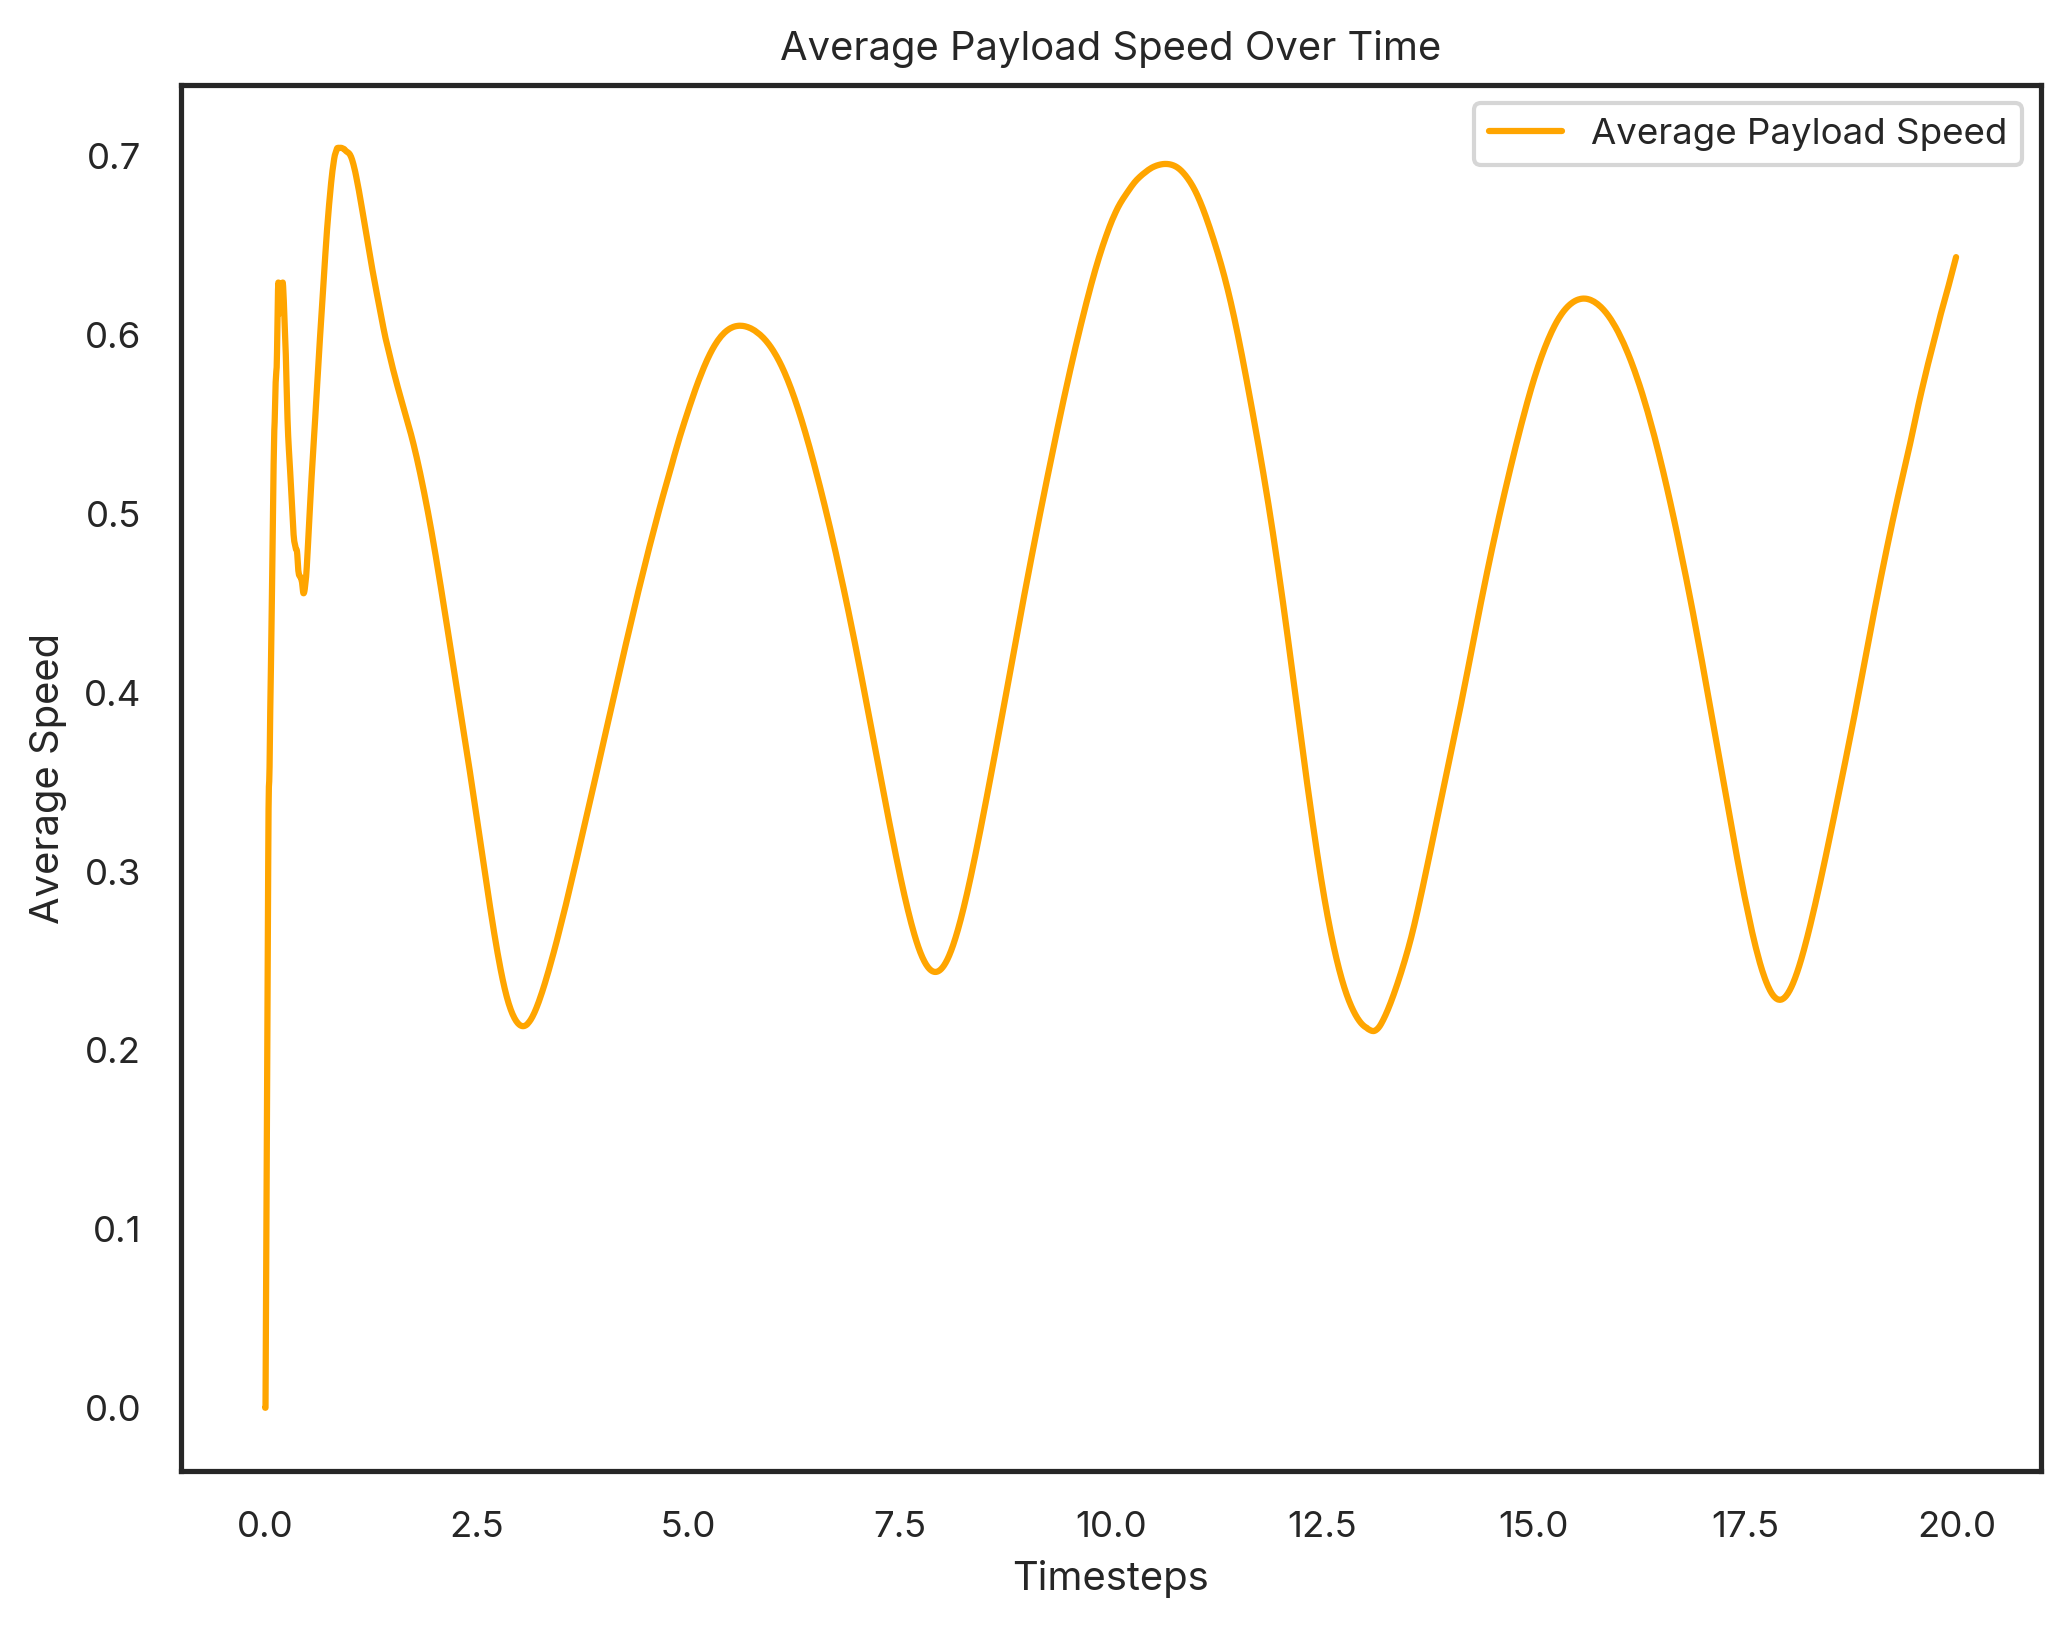

In [60]:
import asdf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_theme(style="white", palette="muted", font_scale=0.8)

import mpl_fontkit as fk
fk.install("Inter")         # downloads Inter from Google Fonts
fk.set_font("Inter") 
# Set the default font size for all plots
plt.rcParams['font.size'] = 10


textwidth = 2*6.32283 # inches from 455,24411 pt textwidth in the document
#set default figure width to textwidth
plt.rcParams['figure.figsize'] = (textwidth, textwidth * 0.618)  # 0.618 is the golden ratio, for a square figure

plt.rcParams['figure.dpi'] = 300  # Set the resolution to 300 DPI for high-quality output


# Path to your ASDF file
file_path = 'experiments_data/2_quads_figure_eight_20250625_164822/2_quads_figure_eight.crazy.asdf'

# Load the ASDF file and read the observations into memory
with asdf.open(file_path) as af:
    obs = np.array(af['flights'][0]['agents']['agent_1']['observations'])
    dones = np.array(af['flights'][0]['global']['dones'])
    
    trajectory = np.array(af['flights'][0]['global']['trajectory'])


print("Shape of observations:", obs.shape)



num_runs = 1
#count dones
num_dones = np.sum(dones[0, :])
print(f"Number of runs: {obs.shape[1]}")




# find index of first done
first_dones = np.argmax(dones,axis=0)

full_runs = np.where(first_dones > 2000)[0]
failed_runs = np.where(first_dones <= 2000)[0]


print(f"Number of full runs: {full_runs.shape[0]}")
# print percentage of runs that are full
percentage_full_runs = full_runs.shape[0] / obs.shape[1] *100
print(f"Percentage of full runs: {percentage_full_runs:.2f}%")



#Dynamic ix4 mapping: {'agent_0': [(0, 2), (3, 5), (30, 32), (6, 29), (54, 57)], 'agent_1': [(0, 2), (3, 5), (6, 8), (30, 53), (58, 61)]}
# Extract payload error (X, Y, Z) for the first num_runs environments
timesteps = obs.shape[0]
time = np.arange(timesteps) * dt
payload = obs[:, :, 0:3]  # shape (timesteps, , 3)
payload_velocity = obs[:, :, 3:6]  # shape (timesteps, , 3)
other_quads = obs[:, :, 6:9]  # shape (timesteps, , 3)

#obs_list = [payload_error, payload_linvel, rel, rot, linvel, angvel, linear_acc, angular_acc]
q_pos = obs[:, :, 9:12]  # shape (timesteps, , 3)
q_rot_mat = obs[:, :, 12:21]  # shape (timesteps, , 9)
q_linvel = obs[:, :, 21:24]  # shape (timesteps, , 3)
q_angvel = obs[:, :, 24:27]  # shape (
q_linacc = obs[:, :, 27:30]  # shape (timesteps, , 3)
q_angacc = obs[:, :, 30:33]  # shape (timesteps, , 3)
q_last_action = obs[:, :, 33:37]  # shape (timesteps, num_runs, 4)







print("Payload shape:", payload.shape)
print("Payload velocity shape:", payload_velocity.shape)
print("Other quads shape:", other_quads.shape)
print("q_pos shape:", q_pos.shape)
print("q_rot_mat shape:", q_rot_mat.shape)
print("q_linvel shape:", q_linvel.shape)
print("q_angvel shape:", q_angvel.shape)
print("q_linacc shape:", q_linacc.shape)
print("q_angacc shape:", q_angacc.shape)
print("q_last_action shape:", q_last_action.shape)  




# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print(f"Payload shape (timesteps, runs, dims): {payload.shape}")

# Plot final positions in 3D
final_pos = payload[-1]
xs, ys, zs = final_pos[:, 0], final_pos[:, 1], final_pos[:, 2]
ax.scatter(xs, ys, zs, c=range(final_pos.shape[0]), cmap='viridis', depthshade=True)

# render path
for run in range(num_runs):
    path = payload[:, full_runs[run] , :]  # Extract the path for each run
    ax.plot(path[:, 0], path[:, 1], path[:, 2], alpha=0.5)  # Plot the path
# Set limits for better visualization
ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
ax.set_zlim([np.min(zs), np.max(zs)])

# Labels and title
ax.set_xlabel('Payload Error X')
ax.set_ylabel('Payload Error Y')
ax.set_zlabel('Payload Error Z')
ax.set_title('Final Payload Error Position in 3D')

# plot only in xy plane with color based on time
fig2, ax2 = plt.subplots( figsize=(textwidth/2, textwidth/2 * 0.618))  # 0.618 is the golden ratio, for a square figure
#plot trajectory in xy plane as line
ax2.plot(trajectory[:, 0], trajectory[:, 1], color='gray', alpha=0.5, linewidth=1, label='Trajectory')



# plot payload error
for run in range(num_runs):
    # path is payload error = target - payload_pos, now we want the pos from the error and trajectory

    path = trajectory - payload[:, full_runs[run], :]
    sc = ax2.scatter(path[:, 0], path[:, 1],
                     c=time[:],
                     cmap='crest',
                     s=1,         # smaller point size
                     alpha=0.6)
    

colors = sns.color_palette()
q1_color = colors[0]  
q2_color = colors[1] 
payload_color = sns.color_palette("crest")[0]

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')

# mark start position of the payload
start_pos = trajectory[0] - payload[0, full_runs[0], :]
ax2.scatter(start_pos[0], start_pos[1], color=payload_color, s=50, label='Payload Start Position')

 

# mark start positions of both quads
for run in range(num_runs):

    q1_start_pos = start_pos + q_pos[0, full_runs[run], :]
    q2_start_pos = start_pos + other_quads[0, full_runs[run], :]
    ax2.scatter(q1_start_pos[0], q1_start_pos[1], color=q1_color, s=50, label='Quad 1 Start', marker='x')
    ax2.scatter(q2_start_pos[0], q2_start_pos[1], color=q2_color, s=50, label='Quad 2 Start', marker='x')
    ax2.legend(loc='lower center', fontsize='small')
    #connect the start positions with a line to the payload start position
    ax2.plot([start_pos[0], q1_start_pos[0]], [start_pos[1], q1_start_pos[1]], color=q1_color, linestyle='--', linewidth=0.5)
    ax2.plot([start_pos[0], q2_start_pos[0]], [start_pos[1], q2_start_pos[1]], color=q2_color, linestyle='--', linewidth=0.5)    

# plot also the quad trajectory in the xy plane as a thin transparent line

for run in range(num_runs):
    payload_pos = trajectory - payload[:, full_runs[run], :]  # Extract the payload position for each run
    q1_path = payload_pos + q_pos[:, full_runs[run], :]  # Extract the quad 1 position for each run
    q2_path = payload_pos + other_quads[:, full_runs[run], :]  # Extract the quad 2 position for each run
 # dotted lines for quad paths
    ax2.plot(q1_path[:, 0], q1_path[:, 1], color=q1_color, alpha=0.5, linewidth=1, linestyle=(0,(5,10)))
    ax2.plot(q2_path[:, 0], q2_path[:, 1], color=q2_color, alpha=0.5, linewidth=1, linestyle=(0,(5,10)))

ax2.set_aspect('equal', adjustable='box')


cbar = fig2.colorbar(sc, ax=ax2)
cbar.set_label('Time [s]')
plt.savefig('crazyvis/plots/payload_position_xy.png', bbox_inches='tight')

# Show the plots
plt.figure(figsize=(textwidth/2, textwidth/2 * 0.618))
plt.subplot(1, 2, 1)
plt.plot(time, payload[:, 0, 0], label='Payload Error X')
plt.plot(time, payload[:, 0, 1], label='Payload Error Y')
plt.plot(time, payload[:, 0, 2], label='Payload Error Z')
plt.xlabel('Timesteps')
plt.ylabel('Payload Error')

plt.legend()

# Compute the norm of linear velocity at each timestep for each run
linvel_norm = np.linalg.norm(q_linvel, axis=2)  # shape (timesteps, num_runs)

# Plot all runs
fig3, ax3 = plt.subplots(figsize=(8, 6))
for r in range(num_runs):
    end = first_dones[2]
    linvel_norm = np.linalg.norm(q_linvel[:end,2,:], axis=1)
    ax3.plot(time[:end], q_linvel[:end,2,:], alpha=0.3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('||Linear Velocity||')
ax3.set_title('Norm of Linear Velocity over Time (all runs)')
plt.show()

# plot showing the norm of payload error over time
# show the percentiles of runs
fig4, ax4 = plt.subplots(figsize=(textwidth/2,  textwidth/2 * 0.618))  # 0.618 is the golden ratio, for a square figure
percentiles = [0, 25, 40, 50, 60,  75, 100]


p_error_norm = np.linalg.norm(payload[:, : , :], axis=2)  # shape (timesteps, num_runs)
first_dones_hist, bins = np.histogram(first_dones*dt, bins=20)
ax4.bar(bins[:-1], first_dones_hist/np.max(first_dones_hist), width=np.diff(bins), align='edge', alpha=0.5, label='Terminations', color='gray')


for p in percentiles:
    p_val = np.percentile(p_error_norm, p, axis=1)
    ax4.plot(time[:], p_val, label=f'{p}th Percentile', alpha=0.7)
ax4.set_xlabel('Time')
ax4.set_ylabel('Payload Error Norm')

 
# crate a line plot of the first dones over time



ax4.legend()   
# save the figure
plt.savefig('crazyvis/plots/payload_error_over_time.png', bbox_inches='tight')


#calculate the average payload speed

avg_payload_speed = np.mean(np.linalg.norm(payload_velocity, axis=2), axis=1)  # shape (timesteps,)
fig5, ax5 = plt.subplots(figsize=(8, 6))
ax5.plot(time, avg_payload_speed, label='Average Payload Speed', color='orange')
ax5.set_xlabel('Timesteps')
ax5.set_ylabel('Average Speed')
ax5.set_title('Average Payload Speed Over Time')
ax5.legend()
print ("Average Payload Speed:", np.mean(avg_payload_speed))

dones [[ 0.23651265 -0.08175635  0.9681826 ]
 [-0.16772872 -0.1387143   0.90486073]
 [-0.3801297  -0.90198106  0.20477207]
 [ 0.81885093 -0.56163186  0.11854451]
 [-0.21359318  0.38826314  0.8964539 ]
 [-0.01398455 -0.08159228  0.30510926]
 [ 0.48189852  0.47117835  0.7387589 ]
 [ 0.53101116 -0.1464375   0.80058956]
 [-0.05674384 -0.08298096  0.9949343 ]
 [ 0.12960835  0.5212062   0.84353167]]


Text(0.5, 0.92, 'Start Positions of Payload and Other Quads in 3D')

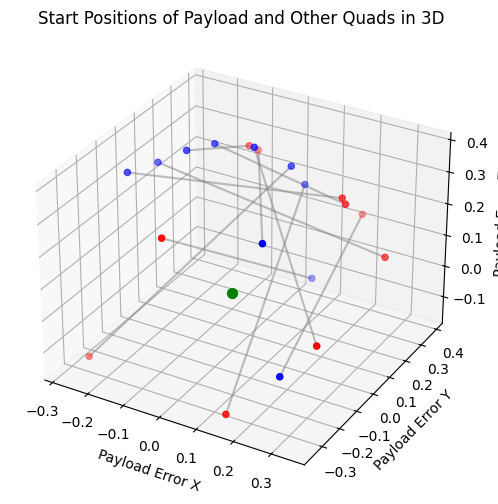

In [114]:
#plot the start pos q_pos and other quad as a connected line in 3D
fig5 = plt.figure(figsize=(8, 6))
ax5 = fig5.add_subplot(111, projection='3d')    
# Plot start positions of payload and other quads
runs_to_plot = failed_runs[:10]
start_payload = q_pos[first_dones[runs_to_plot], runs_to_plot, :]
start_other_quads = other_quads[first_dones[runs_to_plot], runs_to_plot, :]

print("dones", payload[first_dones[runs_to_plot], runs_to_plot, :])
ax5.scatter(start_payload[:, 0], start_payload[:, 1], start_payload[:, 2], c='blue', label='Start Payload', depthshade=True)
ax5.scatter(start_other_quads[:, 0], start_other_quads[:, 1], start_other_quads[:, 2], c='red', label='Start Other Quads', depthshade=True)
# Connect the start positions with lines
for run in range(10):
    payload_start = start_payload[run]
    other_quad_start = start_other_quads[run]
    ax5.plot([payload_start[0], other_quad_start[0]],
             [payload_start[1], other_quad_start[1]],
             [payload_start[2], other_quad_start[2]], c='gray', alpha=0.5)

#mark 0,0 in green
ax5.scatter(0, 0, 0, c='green', s=50, label='Origin (0,0,0)', depthshade=True)


# Labels and title
ax5.set_xlabel('Payload Error X')
ax5.set_ylabel('Payload Error Y')
ax5.set_zlabel('Payload Error Z')
ax5.set_title('Start Positions of Payload and Other Quads in 3D')

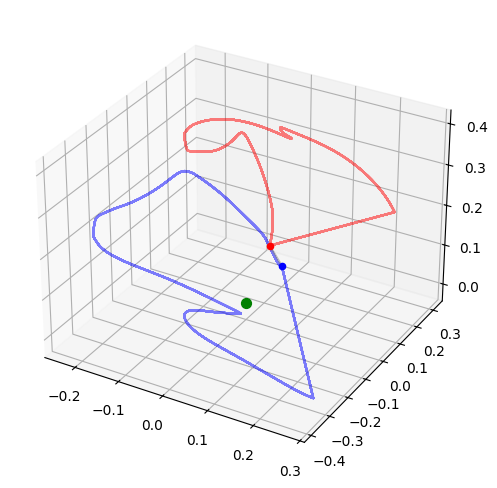

In [111]:
# plot payload pos q_pos and other quad over time in 3D. Mark the pos at the first timestep with dots connected by q_pos->payload and other_quads->payload
fig6 = plt.figure(figsize=(8, 6))
ax6 = fig6.add_subplot(111, projection='3d')
# Plot the trajectory of payload and other quads over time
for run in range(1):
    payload_path = q_pos[:, failed_runs[run], :]
    other_quads_path = other_quads[:, failed_runs[run], :]
    ax6.plot(payload_path[:, 0], payload_path[:, 1], payload_path[:, 2], c='blue', alpha=0.5, label='Payload Path' if run == 0 else "")
    ax6.plot(other_quads_path[:, 0], other_quads_path[:, 1], other_quads_path[:, 2], c='red', alpha=0.5, label='Other Quads Path' if run == 0 else "")
    
    # Mark the first position with a dot
    ax6.scatter(payload_path[0, 0], payload_path[0, 1], payload_path[0, 2], c='blue', s=20)
    ax6.scatter(other_quads_path[0, 0], other_quads_path[0, 1], other_quads_path[0, 2], c='red', s=20)
# Connect the first positions with a line
    ax6.plot([payload_path[0, 0], other_quads_path[0, 0]],
                [payload_path[0, 1], other_quads_path[0, 1]],
                [payload_path[0, 2], other_quads_path[0, 2]], c='gray', alpha=0.5)
# Mark 0,0 in green
ax6.scatter(0, 0, 0, c='green', s=50, label='Origin (0,0,0)', depthshade=True)


Text(0.5, 1.0, 'Figure-Eight Trajectory')

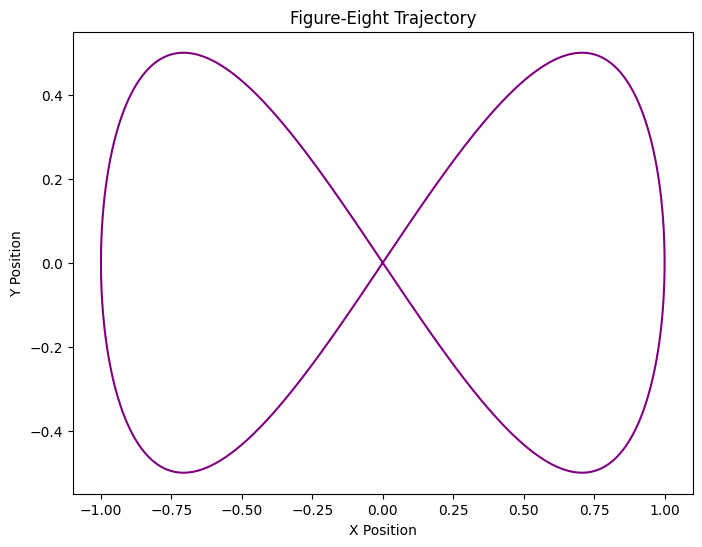

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0           # Lemniscate scale factor
T = 2 * np.pi     # Full cycle duration
N = 1000          # Number of points

# Time vector
t = np.linspace(0, T, N)

# Scale factor and trajectory
scale = 2 / (3 - np.cos(2 * t))
x = scale * np.cos(t)
y = scale * np.sin(2 * t) / 2



def figure_eight(t, width=1.0, height=1.0, rounds=1):
    """
    Generate a figure-eight trajectory.

    Parameters:
    - t: 1D array of time instants (must be monotonic).
    - width: Width (peak-to-peak) of the figure-8 in x.
    - height: Height (peak-to-peak) of the figure-8 in y.
    - rounds: Number of complete figure-8 loops over the span of t.
    """
    t0, t1 = t[0], t[-1]
    # normalize to [0, 2π·rounds]
    t_scaled = 2 * np.pi * rounds * (t - t0) / (t1 - t0)

    x = width  * np.sin(t_scaled)
    y = height * np.sin(2 * t_scaled) / 2

    return x, y



x, y = figure_eight(t, width=1.0, height=1.0)
# Plot the figure-eight trajectory

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Figure-Eight Trajectory', color='purple')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Figure-Eight Trajectory')

/var/folders/dr/wtxk_thd0qq23q13gk_ddc_80000gn/T/ipykernel_14990/2531726558.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/quad-rl-mjx/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


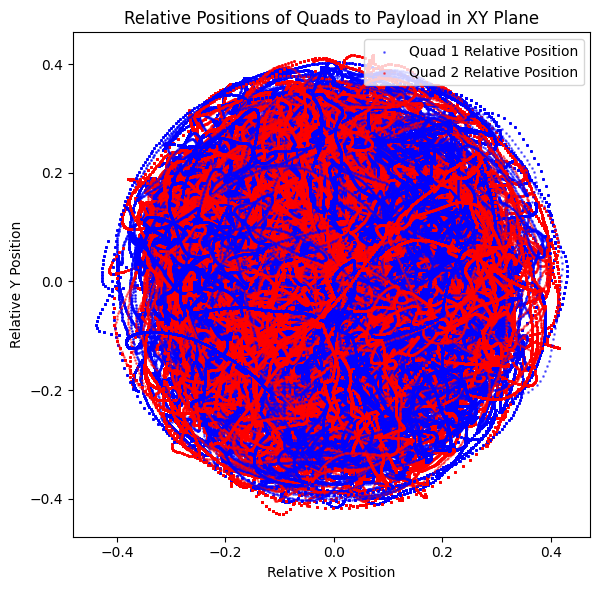

In [203]:
# plot the quads positions relative to the payload in the xy plane
fig7, ax7 = plt.subplots(figsize=(8, 6))
for run in range(num_runs):
    q1_rel = q_pos[:, run, :]
    q2_rel = other_quads[:, run, :]

    # plot the relative positions
    ax7.scatter(q1_rel[ :, 0] ,
                q1_rel[ :, 1] ,
                c='blue', s=1, alpha=0.5, label='Quad 1 Relative Position' if run == 0 else "")
    ax7.scatter(q2_rel[ :, 0] ,
                q2_rel[ :, 1] ,
                c='red', s=1, alpha=0.5, label='Quad 2 Relative Position' if run == 0 else "")  
    
    ax7.set_xlabel('Relative X Position')
    ax7.set_ylabel('Relative Y Position')
    ax7.set_title('Relative Positions of Quads to Payload in XY Plane')
    ax7.set_aspect('equal', adjustable='box')
ax7.legend()
# Show the plots
plt.tight_layout()
plt.show()

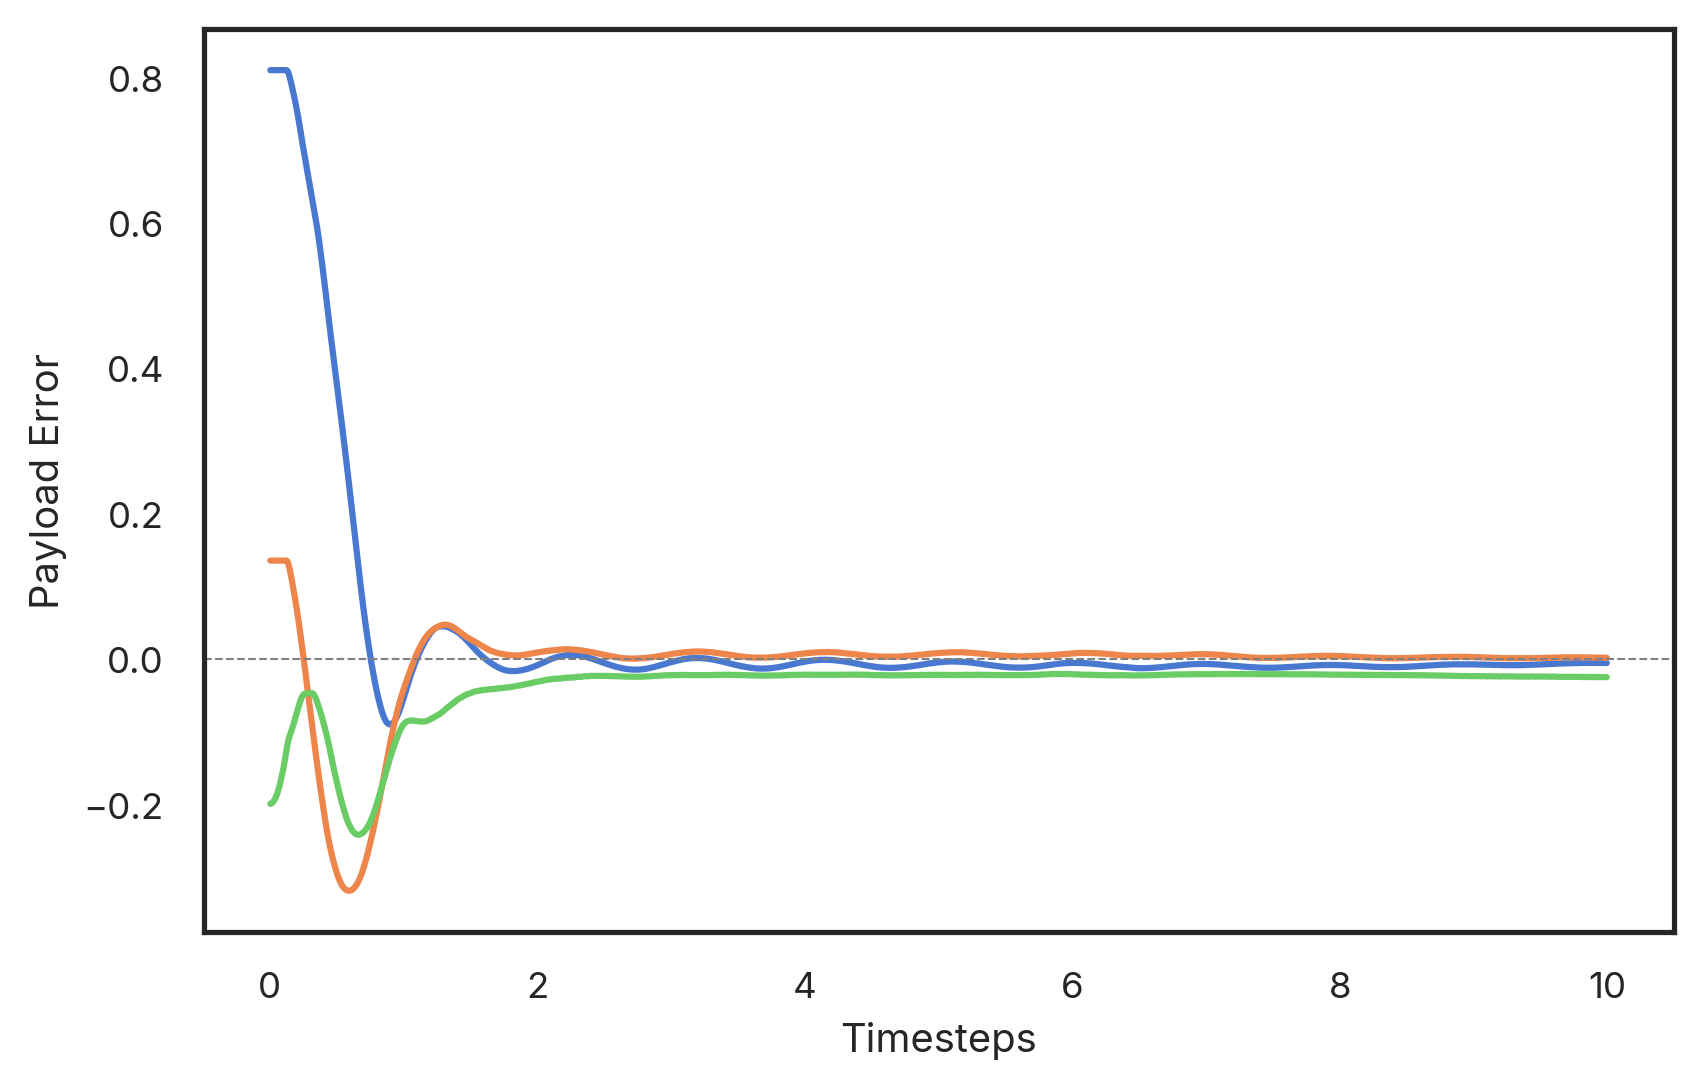

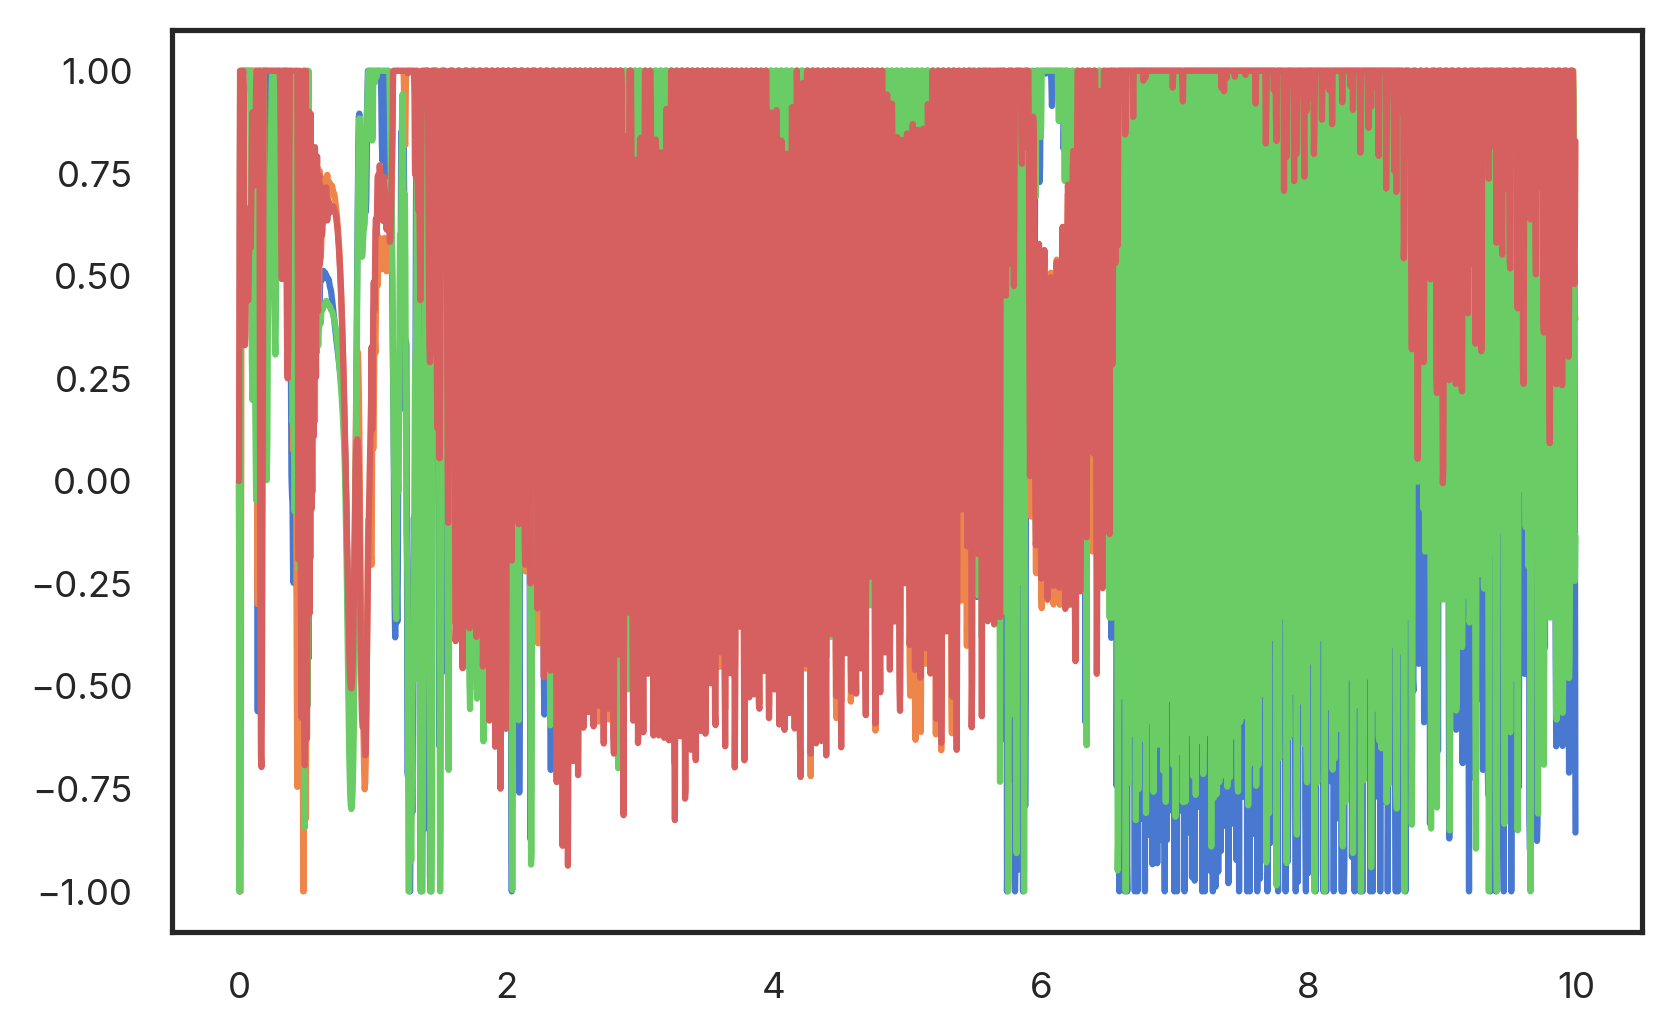

In [51]:
# plot the payload position error in x,y,z each as a line over a dashed line at 0
fig8, ax8 = plt.subplots(figsize=(textwidth/2, textwidth/2 * 0.618))  # 0.618 is the golden ratio, for a square figure
ax8.plot(time[1:], payload[1:,full_runs[1], 0], label='Payload Error X',
            )
ax8.plot(time[1:], payload[1:,full_runs[1], 1], label='Payload Error Y',
            )
ax8.plot(time[1:], payload[1:,full_runs[1], 2], label='Payload Error Z',
            )
ax8.axhline(0, color='gray', linestyle='--', linewidth=0.5, label='Zero Line')
ax8.set_xlabel('Timesteps')
ax8.set_ylabel('Payload Error')

# plot quad actions over time (4 thrusts   )
fig9, ax9 = plt.subplots(figsize=(textwidth/2, textwidth/2 * 0.618))  # 0.618 is the golden ratio, for a square
ax9.plot(time, q_last_action[:, full_runs[1], 0], label='Quad 1 Thrust 1')
ax9.plot(time, q_last_action[:, full_runs[1], 1], label='Quad 1 Thrust 2')
ax9.plot(time, q_last_action[:, full_runs[1], 2], label='Quad 1 Thrust 3')
ax9.plot(time, q_last_action[:, full_runs[1], 3], label='Quad 1 Thrust 4')